In [126]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (7,4)

pd.options.mode.chained_assignment = None

# importing data
df = pd.read_csv(r'C:\Users\HP\Downloads\movies.csv\movies.csv')

In [61]:
#glimpse of data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [127]:
# df.shape
# df.info()
# df.describe()
# df.columns
#df.isnull().sum()

In [70]:

df.fillna({
    'rating': df['rating'].mode()[0],
    'writer': 'Unknown',
    'score' : df['score'].mean(),
    'votes' : df['votes'].median(),
    'released' : 'Unknown',
    'star': 'Unknown',
    'country': 'Unknown',
    'budget': df['budget'].median(),
    'gross': df['gross'].median(),
    'company': 'Unknown',
    'runtime': df['runtime'].mean()
}, inplace=True)


In [ ]:
#df.isnull().sum()

In [75]:
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

In [111]:
df.sort_values(by = 'gross', inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [84]:
df = df.sort_values(by = 'gross', inplace = False, ascending = False)

In [99]:
str_cols = df.select_dtypes(include = 'object').columns
str_cols

Index(['name', 'rating', 'genre', 'released', 'director', 'writer', 'star',
       'country', 'company'],
      dtype='object')

In [100]:
df[str_cols] = df[str_cols].apply(lambda x: x.str.strip())

In [109]:
num_df = df.select_dtypes(include =['Int64','float64'])

In [110]:
corr = num_df.corr()
corr

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222573,0.291690,0.259504,0.120766
score,0.097936,1.000000,0.409173,0.061970,0.185579,0.399329
votes,0.222573,0.409173,1.000000,0.460968,0.632120,0.309138
budget,0.291690,0.061970,0.460968,1.000000,0.745881,0.273345
gross,0.259504,0.185579,0.632120,0.745881,1.000000,0.244353
runtime,0.120766,0.399329,0.309138,0.273345,0.244353,1.000000


In [ ]:
# #scatter plot with budget vs gross
# plt.scatter(x=df['budget'],y=df['gross'])

# plt.title('Budget vs Gross Earnings')
# plt.xlabel('Gross Earnings')
# plt.ylabel('Budget for Film')

# plt.show()

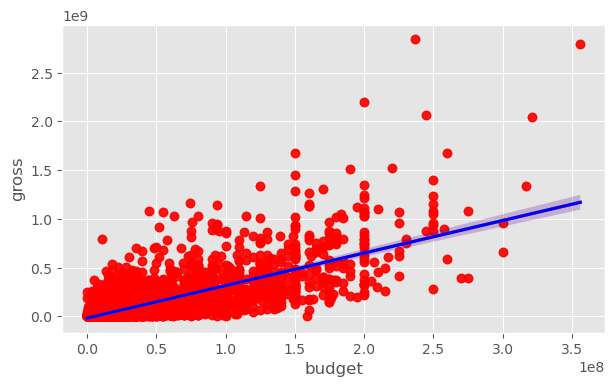

In [128]:
##regplot: plot the budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df)
#will give correlation line)
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.show()

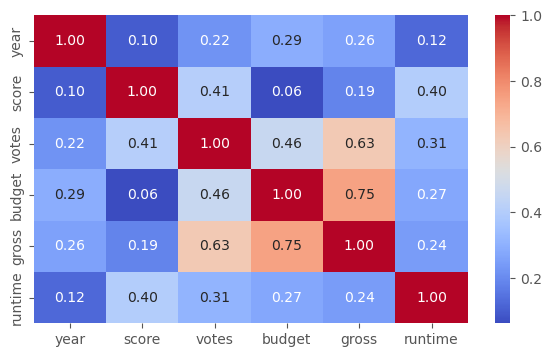

In [129]:
sns.heatmap(corr,annot = True,cmap='coolwarm', fmt=".2f")
plt.show()

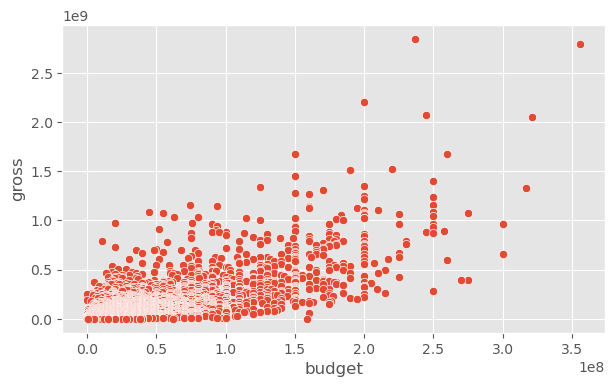

In [130]:
sns.scatterplot(data = num_df, x = 'budget', y= 'gross')
plt.show()

In [120]:
#unstacking
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values()

In [114]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross    votes      0.632120
votes    gross      0.632120
budget   gross      0.745881
gross    budget     0.745881
votes    votes      1.000000
year     year       1.000000
gross    gross      1.000000
budget   budget     1.000000
score    score      1.000000
runtime  runtime    1.000000
dtype: float64